In [1]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import numpy as np
import networkx as nx
from tqdm.auto import tqdm

from multisoc.generate.multidimensional_network import multidimensional_network_fix_av_degree
from multisoc.generate.two_dimensional_population import consol_comp_pop_frac_tnsr

## 1. Generate network

In [2]:
# seed = 6 ## for reproducibility
# np.random.seed(seed) ## 99,5,6!!

f1m = 0.25
f2m = 0.45 ## 0.4
h_mtrx_lst = [ np.array([[0.85,0.15],[0.15,0.85]]), np.array([[0.85,0.15],[0.15,0.85]]) ] ## List of 1d homophily matrices
pop_fracs_lst = [[f1m,1-f1m],[f2m,1-f2m]] ## The marginals of the population distribution defined by comp_pop_frac_tnsr
consol = 0.2
comp_pop_frac_tnsr = consol_comp_pop_frac_tnsr(pop_fracs_lst,consol)

N = 200
kind = "all"
p_d = [0.5, 0.5]

G = multidimensional_network_fix_av_degree(
                h_mtrx_lst,
                comp_pop_frac_tnsr,
                kind,
                directed=True,
                pop_fracs_lst = pop_fracs_lst,
                N=N,
                m=10,
                v = 0,
                p_d = p_d
                )

## 2. Remove isolated nodes and compute node positions with spring layout

In [3]:
G.remove_nodes_from(list(nx.isolates(G)))
pos = nx.kamada_kawai_layout(G,scale=3)

## 3. Define style of network plot

In [4]:
color_dict = {
    (0,0):"#8A2846",
    (0,1):"#03045E",
    (1,0):"#FFC2D4",
    (1,1):"#CAF0F8"
    }
groups_lst = [(0,0),(0,1),(1,0),(1,1)]
group_labels = [["B","W"],["♀","♂"]]
colors_race = ["#595959","#d9d9d9"]
colors_gender = ["#c63963","#3A6CC6"]
nodelist = G.nodes()
node_colors = [color_dict[G.nodes[i]["attr"]] for i in nodelist]

## 4. Plot population distribution (empty graph) and final network

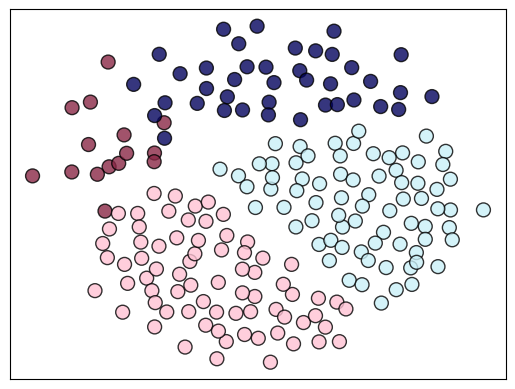

In [5]:
n = len(G.nodes())
node_size = 40000*(1/(n+200))

nx.draw_networkx_nodes(G,
                     # with_labels = False,
                     pos=pos,
                     nodelist=nodelist,
                     node_color=node_colors,
                     node_size=node_size,
                     # node_shape=shape_dict[key],
                     alpha = .8,
                     linewidths = 1,
                     edgecolors = 'black',
                     # ax=ax
                )


## To save the figure
# plt.savefig(f"Fig1d.svg",dpi=600)
plt.show()

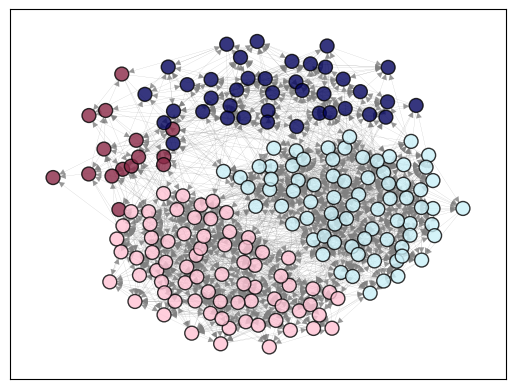

In [6]:
nx.draw_networkx(G,
                     with_labels = False,
                     pos=pos,
                     nodelist=nodelist,
                     node_color=node_colors,
                     node_size=node_size,
                     # node_shape=shape_dict[key],
                     width=0.1,
                     alpha = .8,
                     arrowstyle = '-|>',
                     linewidths = 1,
                     edgecolors = 'black',
                     edge_color = 'grey', ## v2
                     # ax=ax
                )

# plt.savefig(f"Fig1e.svg",dpi=600)
plt.show()

## 5. Simulate same network 100 times and compute degrees

In [7]:
iterations = 100

mean_degrees_lst = {i:[] for i in groups_lst}
mean_degrees_1d_lst = {i:{j:[] for j in [0,1]} for i in [0,1]}

for it in tqdm(range(iterations)):
    
    f1m = 0.25
    f2m = 0.45 ## 0.4
    h_mtrx_lst = [ np.array([[0.85,0.15],[0.15,0.85]]), np.array([[0.85,0.15],[0.15,0.85]]) ] ## List of 1d homophily matrices
    pop_fracs_lst = [[f1m,1-f1m],[f2m,1-f2m]] ## The marginals of the population distribution defined by comp_pop_frac_tnsr
    consol = 0.2
    comp_pop_frac_tnsr = consol_comp_pop_frac_tnsr(pop_fracs_lst,consol)
    
    N = 200
    kind = "all"
    p_d = [0.5, 0.5]
    
    G = multidimensional_network_fix_av_degree(
                    h_mtrx_lst,
                    comp_pop_frac_tnsr,
                    kind,
                    directed=True,
                    pop_fracs_lst = pop_fracs_lst,
                    N=N,
                    m=10,
                    v = 0,
                    p_d = p_d
                    )

    degree_dct = dict(G.in_degree)

    group_degrees = {}
    
    for gi in color_dict:
        group_degrees[gi] = [di for ni,di in degree_dct.items() if G.nodes[ni]["attr"] == gi]

    for gi in mean_degrees_lst:
        mean_degrees_lst[gi].append(np.mean(group_degrees[gi]))
    
    group_degrees_1d = {0:{},1:{}}
    for dim in [0,1]:
        for gi in [0,1]:
            group_degrees_1d[dim][gi] = [di for ni,di in degree_dct.items() if G.nodes[ni]["attr"][dim] == gi]

    for di in mean_degrees_1d_lst:
        for gi in mean_degrees_1d_lst[di]:
            mean_degrees_1d_lst[di][gi].append(np.mean(group_degrees_1d[di][gi]))

  0%|          | 0/100 [00:00<?, ?it/s]

## 6. Compute degrees

In [8]:
group_degrees = {}
for gi in color_dict:
    group_degrees[gi] = [di for ni,di in degree_dct.items() if G.nodes[ni]["attr"] == gi]
group_degrees_1d = {0:{},1:{}}
for dim in [0,1]:
    for gi in [0,1]:
        group_degrees_1d[dim][gi] = [di for ni,di in degree_dct.items() if G.nodes[ni]["attr"][dim] == gi]

## 7. Make degree plots

{0: 0.740136192800053, 1: 0.16132100570496588}
{0: 0.6843188049064689, 1: 0.6161563502903543}


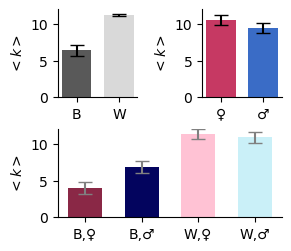

In [9]:
## Degree figure all together
fig = plt.figure(figsize=(0.8*3.5,0.8*3),layout="constrained")

gs = GridSpec(2, 2, figure=fig)
ax_top_left = fig.add_subplot(gs[0, 0])
ax_top_right = fig.add_subplot(gs[0, 1])
ax_bottom = fig.add_subplot(gs[1,:])

ax_bottom.spines[['right', 'top']].set_visible(False)
ax_top_left.spines[['right', 'top']].set_visible(False)
ax_top_right.spines[['right', 'top']].set_visible(False)


mean_degrees = {gi:np.mean(di) for gi,di in mean_degrees_1d_lst[0].items()}
mean_degrees

std_degrees = {gi:np.std(di) for gi,di in mean_degrees_1d_lst[0].items()}
std_degrees
print (std_degrees)

plt.sca(ax_top_left)
xbar, ybar = zip(*list(mean_degrees.items()))
plt.bar([group_labels[0][i] for i in xbar],ybar,color=colors_race,width=0.7)
plt.errorbar([0,1],ybar,yerr=[std_degrees[i] for i in [0,1]],ls="",capsize=5,color="k")
plt.ylabel("$<k>$")
plt.ylim(0,12)

mean_degrees = {gi:np.mean(di) for gi,di in mean_degrees_1d_lst[1].items()}
mean_degrees

std_degrees = {gi:np.std(di) for gi,di in mean_degrees_1d_lst[1].items()}
std_degrees
print (std_degrees)

plt.sca(ax_top_right)
xbar, ybar = zip(*list(mean_degrees.items()))
plt.bar([group_labels[1][i] for i in xbar],ybar,color=colors_gender,width=0.7)
plt.errorbar([0,1],ybar,yerr=[std_degrees[i] for i in [0,1]],ls="",capsize=5,color="k")
plt.ylabel("$<k>$")
plt.ylim(0,12)

mean_degrees = {gi:np.mean(di) for gi,di in mean_degrees_lst.items()}
mean_degrees

std_degrees = {gi:np.std(di) for gi,di in mean_degrees_lst.items()}
std_degrees

plt.sca(ax_bottom)
xbar, ybar = zip(*list(mean_degrees.items()))
plt.bar([group_labels[0][i[0]]+","+ group_labels[1][i[1]] for i in xbar],
        ybar,
        color=[color_dict[i] for i in groups_lst],
        width=0.6
       )
plt.errorbar(range(4),ybar,yerr=[std_degrees[i] for i in groups_lst],ls="",capsize=5,color="grey")
plt.ylabel("$<k>$")
plt.ylim(0,12)

# plt.savefig(f"temp/Fig1f.png",dpi=600)

plt.show()